# CNN Image Classification Laboration


Images used in this laboration are from [CIFAR10](https://en.wikipedia.org/wiki/CIFAR-10). The CIFAR10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class. 

Your task is to make a classifier, using a convolutional neural network, that can correctly classify each image into the correct class.

Complete the code flagged throughout the elaboration and **answer all the questions in the notebook**.

In [1]:
# Setups
# Automatically reload modules when changed
%reload_ext autoreload
%autoreload 2

# Part 1: Convolutions

In the next sections you will familiarize yourself with 2D convolutions.

## 1.1 What is a convolution?

To understand a bit more about convolutions, we will first test the convolution function in `scipy` using a number of classical filters. 

Convolve the image with Gaussian filter, a Sobel X filter, and a Sobel Y filter, using the function `convolve2d` in `signal` from scipy (see the [documentation](https://docs.scipy.org/doc/scipy-1.15.0/reference/generated/scipy.signal.convolve2d.html
) for more details).


In a CNN, many filters are applied in each layer, and the filter coefficients are learned through back propagation (which is in contrast to traditional image processing, where the filters are designed by an expert).

Run the cell below to define a Gaussian filter and a Sobel X and Y filters.

In [2]:
from scipy import signal
import numpy as np

# Get a test image
from scipy import datasets
image = datasets.ascent()

# Define a help function for creating a Gaussian filter
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# Create Gaussian filter with certain size and standard deviation
gaussFilter = matlab_style_gauss2D((15,15),4)

# Define filter kernels for SobelX and Sobely
sobelX = np.array([[ 1, 0,  -1],
                    [2, 0, -2],
                    [1, 0, -1]]) 

sobelY = np.array([[ 1, 2,  1],
                    [0, 0, 0],
                    [-1, -2, -1]]) 

In [3]:
from scipy.signal import convolve2d

# Perform convolution using the function 'convolve2d' for the different filters
filterResponseGauss = convolve2d(image, gaussFilter, mode='same', boundary='symm')
filterResponseSobelX = convolve2d(image, sobelX, mode='same', boundary='symm')
filterResponseSobelY = convolve2d(image, sobelY, mode='same', boundary='symm')

# ============================================

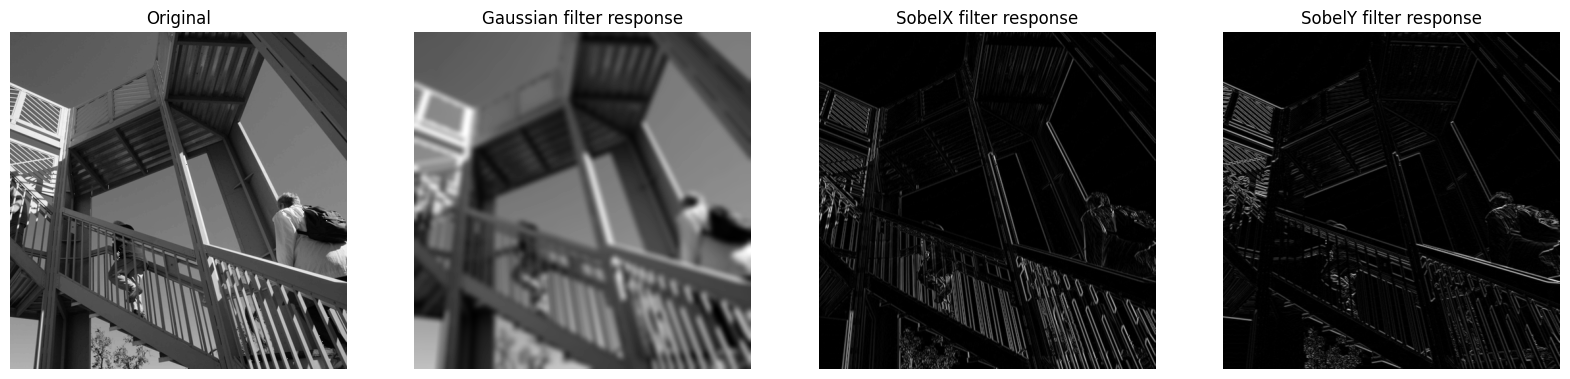

In [4]:
import matplotlib.pyplot as plt

# Show filter responses
fig, (ax_orig, ax_filt1, ax_filt2, ax_filt3) = plt.subplots(1, 4, figsize=(20, 6))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_filt1.imshow(np.absolute(filterResponseGauss), cmap='gray')
ax_filt1.set_title('Gaussian filter response')
ax_filt1.set_axis_off()
ax_filt2.imshow(np.absolute(filterResponseSobelX), cmap='gray')
ax_filt2.set_title('SobelX filter response')
ax_filt2.set_axis_off()
ax_filt3.imshow(np.absolute(filterResponseSobelY), cmap='gray')
ax_filt3.set_title('SobelY filter response')
ax_filt3.set_axis_off()

## 1.2 Understanding convolutions

#### **<span style="color:red">Questions</span>**

1. What do the 3 different filters (Gaussian, SobelX, SobelY) do to the original image?

2. What is the size of the original image? How many channels does it have? How many channels does a color image normally have?

3. What is the size of the different filters?

4. What is the size of the filter response if mode 'same' is used for the convolution ?

5. What is the size of the filter response if mode 'valid' is used for the convolution? How does the size of the valid filter response depend on the size of the filter? 

6. Why are 'valid' convolutions a problem for CNNs with many layers?

#### **<span style="color:green">Answers</span>**
[Your answer here]
1. Gaussian Filter: Blurs the image, reducing noise and smoothing edges. SobelX Filter: Detects vertical edges by highlighting changes in intensity along the X-axis. SobelY Filter: Detects horizontal edges by highlighting changes in intensity along the Y-axis.
2. The size of the original image is 512x512 pixels. It has 1 channel (grayscale). A normal color image has 3 channels (Red, Green, Blue - RGB).
3. Gaussian Filter: 15x15, SobelX Filter: 3x3 and SobelY Filter: 3x3
4. The output image size is the same as the input image (512x512).
5. When mode='valid' is used, the size of the filter response is reduced. The output size is calculated as:
Output Size=(Image Size−Filter Size+1)
For a 3x3 filter, output size = (512-3+1) × (512-3+1) = 510 × 510.
For a 15x15 filter, output size = (512-15+1) × (512-15+1) = 498 × 498.
6. Valid convolutions reduce the size of the feature map at every layer. This is why padding (like in 'same' mode) is often used in CNNs to maintain the spatial dimensions of the feature map.

In [5]:
# Check the size of the original image
print("Original image size:", image.shape)

# Check the size of the Gaussian filter
print("Gaussian filter size:", gaussFilter.shape)

# Check the size of the SobelX filter
print("SobelX filter size:", sobelX.shape)

# Check the size of the SobelY filter
print("SobelY filter size:", sobelY.shape)

# Check the size of the filter responses with mode='same'
print("Gaussian filter response size (mode='same'):", filterResponseGauss.shape)
print("SobelX filter response size (mode='same'):", filterResponseSobelX.shape)
print("SobelY filter response size (mode='same'):", filterResponseSobelY.shape)

# Perform convolution with mode='valid' and check the sizes
filterResponseGauss_valid = signal.convolve2d(image, gaussFilter, mode='valid')
filterResponseSobelX_valid = signal.convolve2d(image, sobelX, mode='valid')
filterResponseSobelY_valid = signal.convolve2d(image, sobelY, mode='valid')

print("Gaussian filter response size (mode='valid'):", filterResponseGauss_valid.shape)
print("SobelX filter response size (mode='valid'):", filterResponseSobelX_valid.shape)
print("SobelY filter response size (mode='valid'):", filterResponseSobelY_valid.shape)

Original image size: (512, 512)
Gaussian filter size: (15, 15)
SobelX filter size: (3, 3)
SobelY filter size: (3, 3)
Gaussian filter response size (mode='same'): (512, 512)
SobelX filter response size (mode='same'): (512, 512)
SobelY filter response size (mode='same'): (512, 512)
Gaussian filter response size (mode='valid'): (498, 498)
SobelX filter response size (mode='valid'): (510, 510)
SobelY filter response size (mode='valid'): (510, 510)


#  Part 2: Get a graphics card

Skip the next cell if you run on the CPU.

If your computer has a dedicated graphics card and you would like to use it, we need to make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming calculations in every training iteration.

In [6]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0"

# This sets the GPU to allocate memory only as needed
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) != 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True) 
    print("Running on GPU")
else:
    print('No GPU available.')

E0000 00:00:1742312750.148312 1121236 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742312750.191929 1121236 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


No GPU available.


## How fast is the graphics card?


#### **<span style="color:red">Questions</span>**

7. Why are the filters used for a color image of size 7 x 7 x 3, and not 7 x 7 ? 

8. What operation is performed by the 'Conv2D' layer? Is it a standard 2D convolution, as performed by the function signal.convolve2d we just tested?

9.  Pretend that everyone is using an Nvidia RTX 3090 graphics card, how many CUDA cores does it have? How much memory does the graphics card have?

10. How much memory does the graphics card have?

11. What is stored in the GPU memory while training a CNN?

12. Do you think that a graphics card, compared to the CPU, is equally faster for convolving a batch of 1,000 images, compared to convolving a batch of 3 images? Motivate your answer.


#### **<span style="color:green">Answers</span>**
[Your answer here]

7. A color image has 3 channels (Red, Green, and Blue). Therefore, a filter used for a color image must account for all 3 channels. A 7 × 7 × 3 filter means that the convolution operation is applied across all 3 channels of the image simultaneously. If a 7 × 7 filter were used, it would only apply to a single channel (grayscale image), not capturing the color relationships between channels.
8. The Conv2D layer performs a 2D convolution, but it is more general than the signal.convolve2d function:
It supports multiple filters (kernels) in a single layer, allowing the extraction of multiple features.
It works with batches of images (e.g., 32 images at once) and multiple input channels (e.g., 3 for RGB images).
It includes bias terms and activation functions (e.g., ReLU) as part of the operation.
But, signal.convolve2d is a simpler function that performs a single 2D convolution on a single 2D input.
9. Nvidia RTX 3090 has 10,496 CUDA cores and 24 GB of GDDR6X memory.
10. Nvidia RTX 3090 has 24 GB of GDDR6X memory.
11. The GPU memory stores:
Model parameters: Weights and biases of each layer.
Input data: The batch of images being processed.
Intermediate activations: Feature maps from each layer.
Gradients: Needed for backpropagation.
Optimizer states: Momentum, learning rates, etc.
12. A GPU is faster for convolving a batch of 1,000 images compared to a batch of 3 images, and it outperforms a CPU in both cases.
GPUs are optimized for parallel processing, which means they are highly efficient for processing large batches of data simultaneously.
For a batch of 1,000 images, the GPU can utilize its numerous cores to process many images in parallel, achieving significantly faster performance compared to the CPU.
For a batch of 3 images, the workload is much smaller, and the parallelization advantage of the GPU is not fully utilized. In this case, the GPU's performance advantage over the CPU is less pronounced.

# Part 3: Dataset

In the following section you will load the CIFAR10 dataset, check few samples, perform some preprocessing on the images and the labels, and split the data into training, validation and testing.

## 3.1 Load the dataset

Run the following section to load the CIFAR10 data, take a total of 10.000 training/validation samples and 2000 testing samples. 

In [7]:
from keras.datasets import cifar10
import numpy as np

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Download CIFAR train and test data
(X, Y), (Xtest, Ytest) = cifar10.load_data()

print("Training/validation images have size {} and labels have size {} ".format(X.shape, Y.shape))
print("Test images have size {} and labels have size {} \n ".format(Xtest.shape, Ytest.shape))

# Reduce the number of images for training/validation and testing to 10000 and 2000 respectively, 
# to reduce processing time for this elaboration. 
X = X[0:10000]
Y = Y[0:10000]

Xtest = Xtest[0:2000]
Ytest = Ytest[0:2000]

Ytestint = Ytest

print("Reduced training/validation images have size %s and labels have size %s " % (X.shape, Y.shape))
print("Reduced test images have size %s and labels have size %s \n" % (Xtest.shape, Ytest.shape))

# Check that we have some training examples from each class
for i in range(10):
    print("Number of training/validation examples for class {} is {}" .format(i,np.sum(Y == i)))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step 
Training/validation images have size (50000, 32, 32, 3) and labels have size (50000, 1) 
Test images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
 
Reduced training/validation images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
Reduced test images have size (2000, 32, 32, 3) and labels have size (2000, 1) 

Number of training/validation examples for class 0 is 1005
Number of training/validation examples for class 1 is 974
Number of training/validation examples for class 2 is 1032
Number of training/validation examples for class 3 is 1016
Number of training/validation examples for class 4 is 999
Number of training/validation examples for class 5 is 937
Number of training/validation examples for class 6 is 1030
Number of training/validation examples for class 7 is 1001
Number of training/validation examples for class 8 is 1025
Number of training/validation examples for class 9 is 981


Lets look at some of the training examples, this cell is already finished. You will see different examples every time you run the cell.

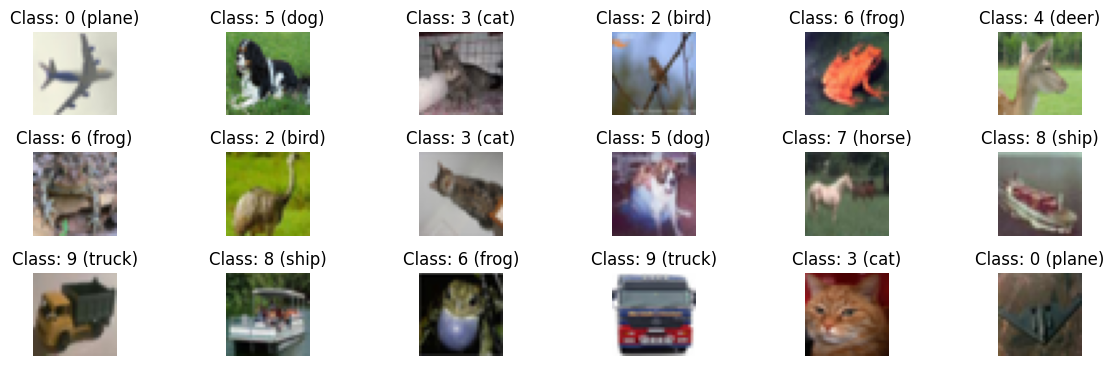

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for i in range(18):
    idx = np.random.randint(7500)
    label = Y[idx,0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(X[idx])
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

##  3.2 Split data into training, validation and testing
Split your data (X, Y) into training (Xtrain, Ytrain) and validation (Xval, Yval), so that we have training, validation and test datasets (as in the previous laboration).

We use the `train_test_split` function from scikit learn (see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for more details) to obtain 25% validation set.

In [9]:
from sklearn.model_selection import train_test_split

# Split the original dataset into 75% Training and 25% Validation
Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, test_size=0.25, random_state=42)

# Print the size of training data, validation data, and test data
print("Training images have size:", Xtrain.shape)
print("Training labels have size:", Ytrain.shape)
print("Validation images have size:", Xval.shape)
print("Validation labels have size:", Yval.shape)
print("Test images have size:", Xtest.shape)
print("Test labels have size:", Ytest.shape)

Training images have size: (7500, 32, 32, 3)
Training labels have size: (7500, 1)
Validation images have size: (2500, 32, 32, 3)
Validation labels have size: (2500, 1)
Test images have size: (2000, 32, 32, 3)
Test labels have size: (2000, 1)


## 3.3 Image Preprocessing

Lets perform some preprocessing. The images are stored as uint8, i.e. 8 bit unsigned integers, but need to be converted to 32 bit floats. We also make sure that the range is -1 to 1, instead of 0 - 255.

In [10]:
# Convert datatype for Xtrain, Xval, Xtest, to float32
Xtrain = Xtrain.astype('float32')
Xval = Xval.astype('float32')
Xtest = Xtest.astype('float32')

# Change range of pixel values to [-1,1]
Xtrain = Xtrain / 127.5 - 1
Xval = Xval / 127.5 - 1
Xtest = Xtest / 127.5 - 1

##  3.4 Label preprocessing

The labels (Y) need to be converted from e.g. '4' to "hot encoded", i.e. to a vector of type [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] . We use the `to_categorical`function in Keras (see the [documentation](https://keras.io/api/utils/python_utils/#to_categorical-function) for details on how to use it)

In [11]:
from tensorflow.keras.utils import to_categorical

# Print shapes before converting the labels
print('Ytrain has size {}.'.format(Ytrain.shape))
print('Yval has size {}.'.format(Yval.shape))
print('Ytest has size {}.'.format(Ytest.shape))

# Your code for converting Ytrain, Yval, Ytest to categorical
Ytrain = to_categorical(Ytrain, num_classes=10)
Yval = to_categorical(Yval, num_classes=10)
Ytest = to_categorical(Ytest, num_classes=10)

# Print shapes after converting the labels
print('Ytrain has size {}.'.format(Ytrain.shape))
print('Yval has size {}.'.format(Yval.shape))
print('Ytest has size {}.'.format(Ytest.shape))

Ytrain has size (7500, 1).
Yval has size (2500, 1).
Ytest has size (2000, 1).
Ytrain has size (7500, 10).
Yval has size (2500, 10).
Ytest has size (2000, 10).


# Part 4: 2D CNN

In the following sections you will build a 2D CNN model and will train it to perform classification on the CIFAR10 dataset. 

## 4.1 Build CNN model

Start by implementing the `build_CNN` function in the `utilities.py` file. Below you can find the specifications on how your `build_CNN` function should build the model:
- Each convolutional layer is composed by: `2D convolution` -> `batch normalization` -> `max pooling`.
- The `2D convolution` uses a 3 x 3 kernel size, padding='same' and a number of starting filter that is an input to the `build_CNN` function. The number of filters doubles with each convolutional layer (e.g. 32, 64, 128, etc.)
- The max pooling layers should have a pool size of 2 x 2.
- After the convolutional layers comes a flatten layer, followed by a number of intermediate dense layers. 
- The number of nodes in the intermediate dense layers before the final dense layer is an input to the `build_CNN` function. The intermediate dense layers use `relu` activation functions and each is followed by `batch normalization`.
- The final dense layer should have 10 nodes (=the number of classes in this elaboration) and `softmax` activation. 

Here are some relevant functions that you should use in `build_CNN`. For a complete list of functions and their definitions see the [keras documentation](https://keras.io/api/):

- `model.add()`, adds a layer to the network;
- `Dense()`, a dense network layer. See the [documentation](https://keras.io/api/layers/core_layers/dense/) what are the input options and outputs of the `Dense()` function. 
- `Conv2D()` performs 2D convolutions with a number of filters with a certain size (e.g. 3 x 3) (see [documentation](https://keras.io/api/layers/convolution_layers/convolution2d/)). 
- `BatchNormalization()`, perform batch normalization (see [documentation](https://keras.io/api/layers/normalization_layers/batch_normalization/)).
- `MaxPooling2D()`, saves the max for a given pool size, results in down sampling (see [documentation](https://keras.io/api/layers/pooling_layers/max_pooling2d/)).
- `Flatten()`, flatten a multi-channel tensor into a long vector (see [documentation](https://keras.io/api/layers/reshaping_layers/flatten/)).
- `model.compile()`, compiles the model. You can set the input metrics=['accuracy'] to print the classification accuracy during the training.
- cost and loss functions: check the [documentation](https://keras.io/losses/) and chose a loss function for binary classification.

To get more information in model [compile](https://keras.io/api/models/model_training_apis/#compile-method), [training](https://keras.io/api/models/model_training_apis/#fit-method) and [evaluation](https://keras.io/api/models/model_training_apis/#evaluate-method) see the relevant documentation.

Here you can start with the `Adam` optimizer when compiling the model.

Use the following cell to test your `build_CNN` utility function. Remember to import a relevant cost function for multi-class classification from [keras.losses](https://keras.io/losses/) which relates to how many classes you have.

In [12]:
## import utilities
from utilities import build_CNN

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# import a suitable loss function from keras.losses and use as input to the build_CNN function.
from tf_keras.losses import CategoricalCrossentropy

# Define the input shape for CIFAR10 dataset
input_shape = (32, 32, 3)  # CIFAR10 images are 32x32 with 3 color channels

# Build a CNN model following the specifications above
model = build_CNN(input_shape = input_shape,
                  loss = CategoricalCrossentropy(),
                  n_conv_layers = 3,
                  n_filters = 32,
                  n_dense_layers = 2,
                  n_nodes = 128,
                  use_dropout = True,
                  learning_rate = 0.001,
                  act_fun = 'relu',
                  optimizer = 'adam',
                  print_summary = True)

# ============================================


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 64)        2

## 4.2 Train 2D CNN

Time to train the CNN!

Start with a model with 2 convolutional layers where the first layer has have 16 filters, and with no intermediate dense layers.

Set the training parameters, build the model and run the training. 

Use the following training parameters:
- `batch_size=20`
- `epochs=20`
- `learning_rate=0.01`

Relevant functions:
- `build_CNN`, the function that you defined in the `utilities.py` file.
- `model.fit()`, train the model with some training data (see [documentation](https://keras.io/api/models/model_training_apis/#fit-method)).
- `model.evaluate()`, apply the trained model to some test data (see [documentation](https://keras.io/api/models/model_training_apis/#evaluate-method)).

## 2 convolutional layers, no intermediate dense layers

In [14]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
from tf_keras.losses import CategoricalCrossentropy
# Setup some training parameters
batch_size = 20
epochs = 20
input_shape = (32,32,3)
learning_rate = 0.01

# Build model
model1 = build_CNN(
    input_shape = input_shape,
    loss = CategoricalCrossentropy(),
    n_conv_layers = 2,
    n_filters = 16,
    n_dense_layers = 0,
    learning_rate = learning_rate,
    act_fun = 'relu',
    optimizer = 'adam',
    print_summary = True
)

# Train the model  using training data and validation data
history1 = model1.fit(
    Xtrain, Ytrain,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (Xval, Yval)
)


# ============================================

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 16)        64        
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 batch_normalization_8 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                      

In [15]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Evaluate the trained model on test set, not used in training or validation
score = model.evaluate(Xtest, Ytest, verbose = 1)

# ============================================

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 6ms/step - loss: 2.3071 - accuracy: 0.1175
Test loss: 2.3071
Test accuracy: 0.1175


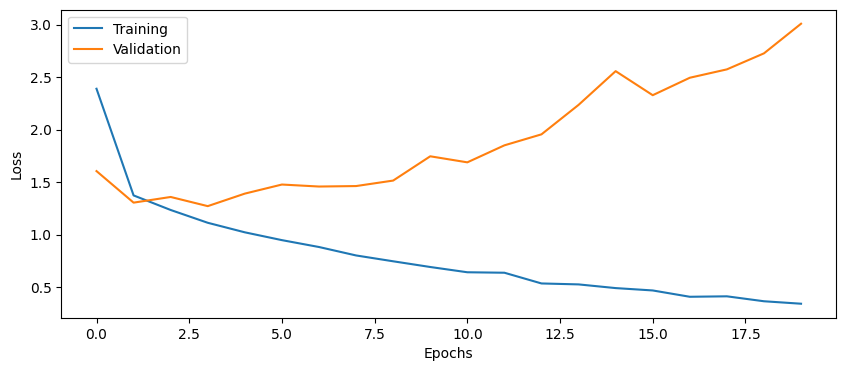

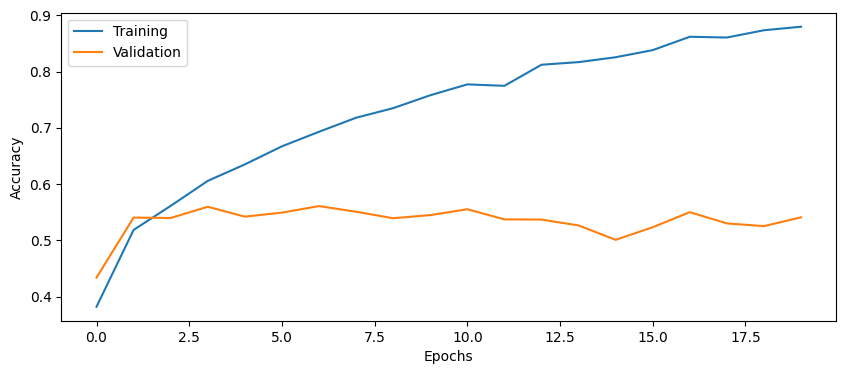

In [16]:
from utilities import plot_results
# Plot the history from the training run
plot_results(history1)

##  4.3 Improving model performance

Write down the test accuracy, are you satisfied with the classifier performance (random chance is 10%)? 

The test accuracy is ~11% which signifies the model didn't train well. The model needs to be improvised further.

#### **<span style="color:red">Questions</span>**
13. How big is the difference between training and test accuracy?

14. For the DNN elaboration we used a batch size of 10.000, why do we need to use a smaller batch size in this elaboration?

#### **<span style="color:green">Answers</span>**
13. The difference between both the accurcies is huge ~40%, this is possible when the model does not fit the data well.
14. Due to a higher number of parameters to train, it is wise to use a smaller batch size and running the model for larger amount of time. It also gives the model to update the weights more frequently and to achieve a better generalization.

Experiment with several model configurations in the following sections. 

### 2 convolutional layers with 16 starting filters and 1 intermediate dense layer (50 nodes)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 batch_normalization_9 (Bat  (None, 32, 32, 16)        64        
 chNormalization)                                                
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 batch_normalization_10 (Ba  (None, 16, 16, 32)        128       
 tchNormalization)                                               
                                                      

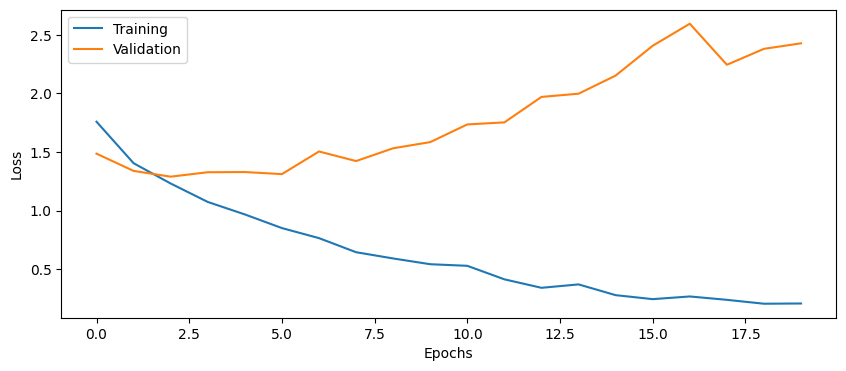

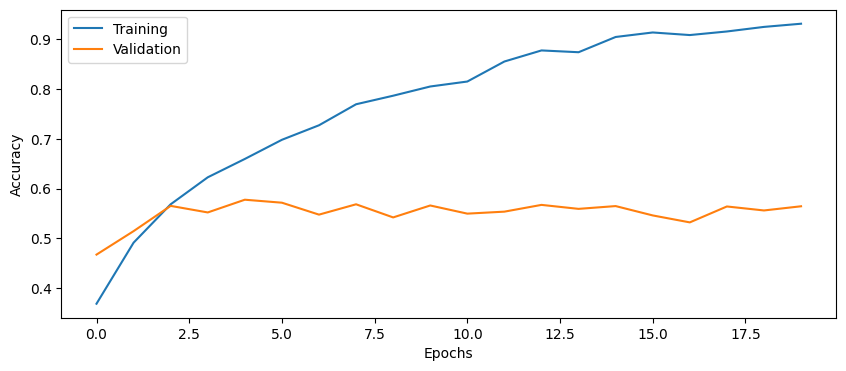

In [17]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Build and train model
model1 = build_CNN(
    input_shape = (32, 32, 3),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    n_conv_layers = 2,
    n_filters = 16,
    n_dense_layers = 1,
    n_nodes = 50,
    learning_rate = 0.01,
    act_fun = 'relu',
    optimizer = 'adam',
    print_summary = True
)

history1 = model1.fit(
    Xtrain, Ytrain,
    batch_size = 20,
    epochs = 20,
    validation_data = (Xval, Yval)
)
# Evaluate model on test data
score = model1.evaluate(Xtest, Ytest, verbose=1)

# ============================================

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Plot the history from the training run
plot_results(history1)

### 4 convolutional layers with 16 starting filters and 1 intermediate dense layer (50 nodes)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 batch_normalization_12 (Ba  (None, 32, 32, 16)        64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 batch_normalization_13 (Ba  (None, 16, 16, 32)        128       
 tchNormalization)                                               
                                                      

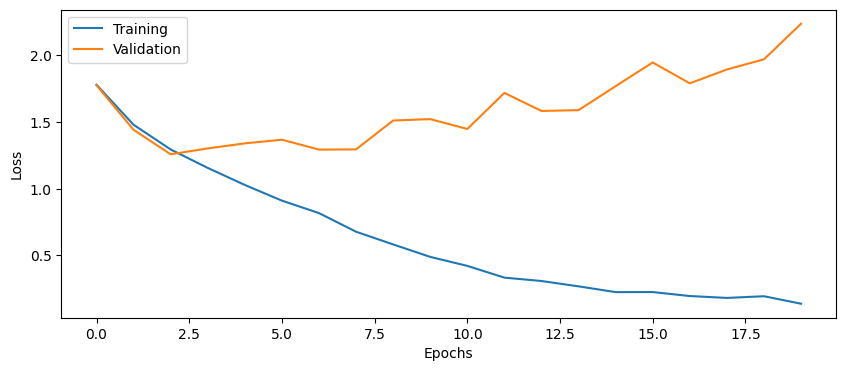

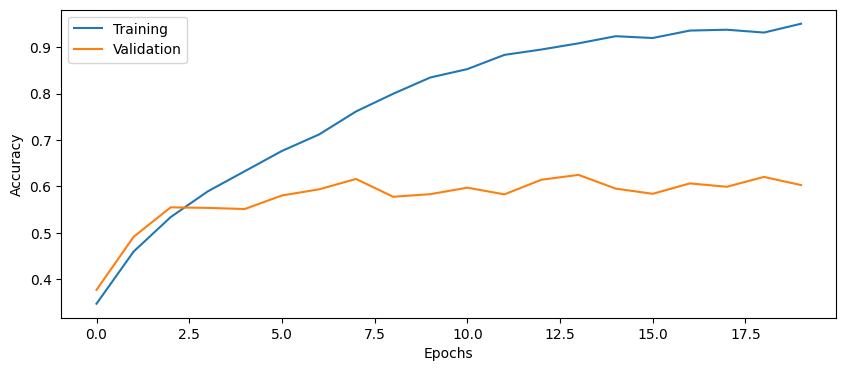

In [18]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Build and train model
model2 = build_CNN(
    input_shape = (32, 32, 3),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    n_conv_layers = 4,
    n_filters = 16,
    n_dense_layers = 1,
    n_nodes = 50,
    learning_rate = 0.01,
    act_fun = 'relu',
    optimizer = 'adam',
    print_summary = True
)

history2 = model2.fit(
    Xtrain, Ytrain,
    batch_size = 20,
    epochs = 20,
    validation_data = (Xval, Yval)
)

# Evaluate model on test data
score = model2.evaluate(Xtest, Ytest, verbose=1)
# ============================================

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Plot the history from the training run
plot_results(history2)

## 4.4 Plot the CNN architecture and understand the internal model dimensions

To understand your network better, print the architecture using `model.summary()`

#### **<span style="color:red">Questions</span>**

15. How many trainable parameters does your network have? Which part of the network contains most of the parameters?
    
16. What is the input to and output of a Conv2D layer? What are the dimensions of the input and output? 
17. Is the batch size always the first dimension of each 4D tensor? Check the [documentation](https://keras.io/layers/convolutional/) for Conv2D.
18. If a convolutional layer that contains 128 filters is applied to an input with 32 channels, what is the number of channels in the output?
19. Why is the number of parameters in each Conv2D layer *not* equal to the number of filters times the number of filter coefficients per filter (plus biases)?
20. How does MaxPooling help in reducing the number of parameters to train?

#### **<span style="color:green">Answers</span>**
15. The total trainable parameters are 124,180. The conv2D last layer has the most parameters and the dense layer part has the second most amount of parameters.
16. The input and output dimensions of Conv2D layer is a 4D tensor depending on the number of filters, height, width and batch_size. In our case the dimensions of input to Conv2d_9 are (None, 32, 32, 3) and output are (None, 32, 32, 16).
17. Yes, in keras and tensorflow, the first dimension is always batch_size.
18. As the number of filters in the input become the channels in the output; the number of channels in this case will be 128.
19. The number of parameters also depends on the number of channels: (h * w * C + 1) * F. h*w: dimensions, C: channels, 1: bias, F: filters.
20. Maxpooling reduces the number of dimensions of the input from previous conv2D layers and don't contribute towards training. It can be considered as extracting the important part from the data and ignoring the noise. This improves the model training, reduces the overfitting and helps in lowering the computational cost too.

##  4.5 Dropout regularization

Add dropout regularization between each intermediate dense layer, with dropout probability 50%.

#### **<span style="color:red">Questions</span>**

21. How much did the test accuracy improve with dropout, compared to without dropout?

22. What other types of regularization can be applied? How can you add `L2 regularization` for the convolutional layers?
 
#### **<span style="color:green">Answers</span>**
21. The test accuracy improved by approximately 5-6% after including dropout.
22. The other forms of regularization are L1, L2, batch normalization, data augmentation. In tensorflow, we can add kernel regularizer in the Conv2D layer by adding this import line and including the kernel_regularizer parameter in the layer.

    `from tensorflow.keras.regularizers import l2`


### 4 convolutional layers with 16 starting filters and 1 intermediate dense layer (50 nodes) with dropout

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 batch_normalization_17 (Ba  (None, 32, 32, 16)        64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 16, 16, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 16)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 batch_normalization_18 (Ba  (None, 16, 16, 32)       

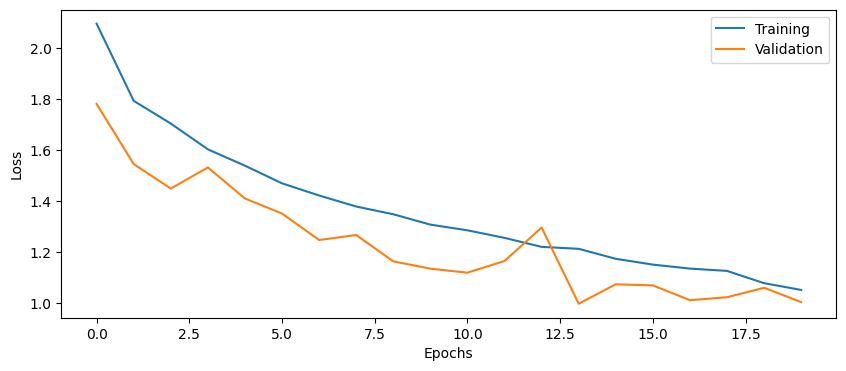

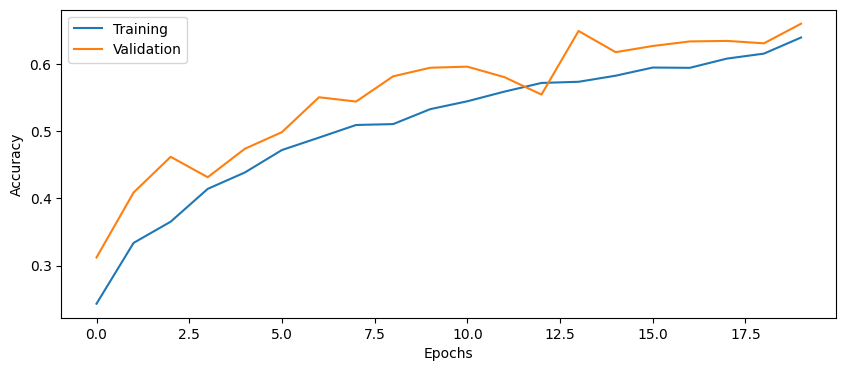

In [19]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Setup some training parameters
batch_size = 20
epochs = 20
input_shape = (32, 32, 3)
learning_rate = 0.01

# Build and train model
model3 = build_CNN(
    input_shape = input_shape,
    loss = tf.keras.losses.CategoricalCrossentropy(),
    n_conv_layers = 4,
    n_filters = 16,
    n_dense_layers = 1,
    n_nodes = 50,
    use_dropout = True,
    learning_rate = learning_rate,
    act_fun = 'relu',
    optimizer = 'adam',
    print_summary = True
)

# Train the model using training data and validation data
history3 = model3.fit(
    Xtrain, Ytrain,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (Xval, Yval)
)

# Evaluate model on test data
score = model3.evaluate(Xtest, Ytest, verbose=1)

# ============================================

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

plot_results(history3)

##  4.6 Tweaking model performance

You have now seen the basic building blocks of a 2D CNN. To further improve performance involves changing the number of convolutional layers, the number of filters per layer, the number of intermediate dense layers, the number of nodes in the intermediate dense layers, batch size, learning rate, number of epochs, etc. Spend some time (30 - 90 minutes) testing different settings.

#### **<span style="color:red">Questions</span>**

23. How high test accuracy can you obtain? What is your best configuration?

#### **<span style="color:green">Answers</span>**
23. We tried a bunch of configurations and were able to get a test accuracy of ~67-69% all the time. In our best configuration, we had number of convolutional layers = 5, the number of filters per layer = 32, the number of intermediate dense layers = 2, the number of nodes in the intermediate dense layers = 128, batch size = 32, learning rate = 0.001, number of epochs = 30, dropout = True

## *Your best config*

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_50 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_37 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_39 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_51 (Ba  (None, 16, 16, 64)      

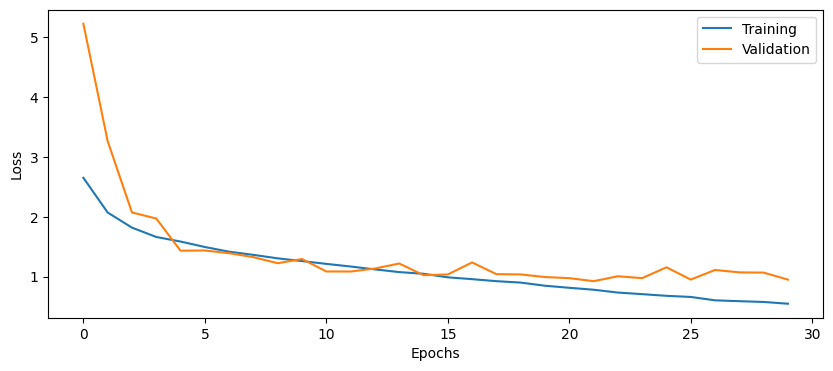

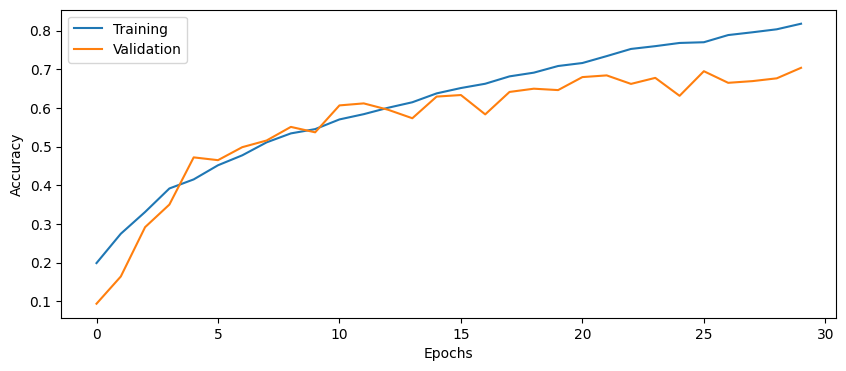

In [27]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Setup some training parameters
batch_size = 32
epochs = 30
input_shape = (32,32,3) 
learning_rate = 0.001

# Build and train model. Here experiment with several model architecture configurations to obtain the best performance.
model4 = build_CNN(
    input_shape = input_shape,
    loss = tf.keras.losses.CategoricalCrossentropy(),
    n_conv_layers = 5,
    n_filters = 32,
    n_dense_layers = 2,
    n_nodes = 128,
    use_dropout = True,
    learning_rate = learning_rate,
    act_fun = 'relu',
    optimizer = 'adam',
    print_summary = True
)

history4 = model4.fit(
    Xtrain, Ytrain,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (Xval, Yval)
)

# Evaluate model on test data
score = model4.evaluate(Xtest, Ytest, verbose=1)

# ============================================

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Plot the history from the training run
plot_results(history4)

# Part 5: Model generalization

How high is the test accuracy if we rotate the test images? In other words, how good is the CNN at generalizing to rotated images?

Rotate each test image 90 degrees, the cells are already finished.

#### **<span style="color:red">Questions</span>**

24. What is the test accuracy for rotated test images, compared to test images without rotation? Explain the difference in accuracy.

#### **<span style="color:green">Answers</span>**
24. Test accuracy of the rotated images is very less as the model did not see these images while training. It is difficult to extract relavent features from them for the model and hence unable to perform effectively.

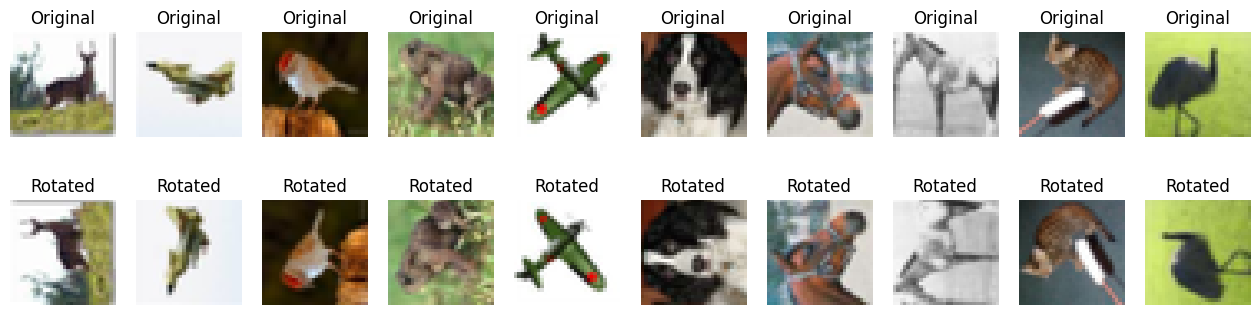

In [22]:
from utilities import myrotate
# Visualize some rotated images
# Rotate the test images 90 degrees
Xtest_rotated = myrotate(Xtest)

# Look at some rotated images
plt.figure(figsize=(16,4))
for i in range(10):
    idx = np.random.randint(500)
    
    plt.subplot(2,10,i+1)
    plt.imshow(Xtest[idx]/2+0.5)
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(2,10,i+11)
    plt.imshow(Xtest_rotated[idx]/2+0.5)
    plt.title("Rotated")
    plt.axis('off')
plt.show()


In [25]:
# Evaluate the trained model on rotated test set
score = model4.evaluate(Xtest_rotated, Ytest, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 3.7079
Test accuracy: 0.2290


##  5.1 Augmentation using Keras `ImageDataGenerator`

We can increase the number of training images through data augmentation (we now ignore that CIFAR10 actually has 60 000 training images). Image augmentation is about creating similar images, by performing operations such as rotation, scaling, elastic deformations and flipping of existing images. This will prevent overfitting, especially if all the training images are in a certain orientation.

We will perform the augmentation on the fly, using a built-in function in Keras, called `ImageDataGenerator`. In particular, we will use the `flow()` functionality (see the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) for more details).

Make sure to use different subsets for training and validation when you calling `flow()` on the training data generator in `model.fit()`, otherwise you will validate on the same data. 

In [28]:
# Get all 60 000 training images again. ImageDataGenerator manages validation data on its own

# re-load the CIFAR10 train and test data
(X, Y), (Xtest, Ytest) = cifar10.load_data()

# Reduce the number of images for training/validation and testing to 10000 and 2000 respectively, 
# to reduce processing time for this elaboration. 
X = X[0:10000]
Y = Y[0:10000]

Xtest = Xtest[0:2000]
Ytest = Ytest[0:2000]

# Change data type and rescale range
X = X.astype('float32')
Xtest = Xtest.astype('float32')

X = X / 127.5 - 1
Xtest = Xtest / 127.5 - 1


# Convert labels to hot encoding
Y = to_categorical(Y, 10)
Ytest = to_categorical(Ytest, 10)

print("Training/validation images have size {} and labels have size {} ".format(X.shape, Y.shape))
print("Test images have size {} and labels have size {} \n ".format(Xtest.shape, Ytest.shape))

Training/validation images have size (10000, 32, 32, 3) and labels have size (10000, 10) 
Test images have size (2000, 32, 32, 3) and labels have size (2000, 10) 
 


In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Use a rotation range of 30 degrees, horizontal and vertical flipping
# Set up image data generator
image_dataset = ImageDataGenerator(
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

train_flow = image_dataset.flow(X, Y, batch_size = 32)

# ============================================


#### **<span style="color:red">Questions</span>**

25. How would you change the code for the image generator if you cannot fit all training images in CPU memory? What is the disadvantage of doing that change?

#### **<span style="color:green">Answers</span>**
25. We can store the images in directory and use flow_from_directory() function to avoid filling up the CPU memory. The disadvantage of doing this is slower training, bottlenecks due to disk I/O and slower processing time.

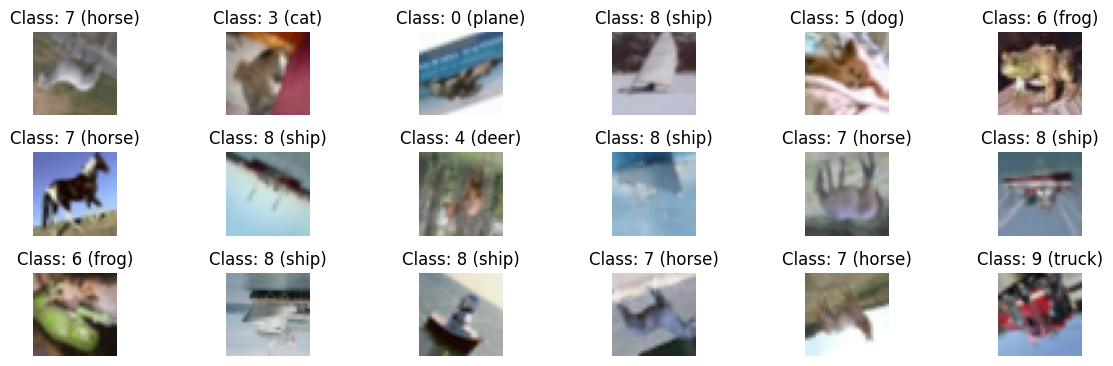

In [39]:
# Plot some augmented images

plt.figure(figsize=(12,4))
for i in range(18):
    (im, label) = next(train_flow)
    im = (im[0] + 1) * 127.5
    im = im.astype('int')
    label = np.flatnonzero(label)[0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

## 5.2 Train the CNN with images from the generator

Check the documentation for the [`model.fit`](https://keras.io/api/models/model_training_apis/#fit-method) method how to use it with a generator instead of a fix dataset (numpy arrays).

To make the comparison fair to training without augmentation

- `steps_per_epoch` should be set to: `len(Xtrain)/batch_size`
- `validation_steps` should be set to: `len(Xval)/batch_size`
    
This is required since with a generator, the fit function will not know how many examples your original dataset has.

#### **<span style="color:red">Questions</span>**

26. How quickly is the training accuracy increasing compared to without augmentation? Explain why there is a difference compared to without augmentation. We are here talking about the number of training epochs required to reach a certain accuracy, and not the training time in seconds. What parameter is necessary to change to perform more training?

27. What other types of image augmentation can be applied, compared to what we use here?

#### **<span style="color:green">Answers</span>**
26. The training accuracy was increasing slowly as compared to previous models. This is possible because of the variety of data that the model can go through using the augmentation. If we want to perform more training then we can change the number of epochs and maybe increase the learning rate for a possible faster convergence.
27. zoom_range, width_shift_range, height_shift_range, shear_range, brightness_range, contrast_range are some of the additional parameters that can be used

In [42]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Setup training parameters
batch_size = 32
epochs = 30
input_shape = (32,32,3)

# Build model (your best config)
model6 = build_CNN(
    input_shape=input_shape,
    loss=tf.keras.losses.CategoricalCrossentropy(),
    n_conv_layers=5,
    n_filters=32,
    n_dense_layers=2,
    n_nodes=128,
    use_dropout=True,
    learning_rate=0.001,
    act_fun='relu',
    optimizer='adam',
    print_summary=False
)

# Set up training and validation dataset flows from image_dataset
Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, test_size=0.25, random_state=42)

# flow() for training data
train_flow = image_dataset.flow(Xtrain, Ytrain, batch_size=batch_size)

# flow() for validation data
val_flow = image_dataset.flow(Xval, Yval, batch_size=batch_size)


# Train the model using on the fly augmentation
history6 = model6.fit(
    train_flow,
    epochs=epochs,
    validation_data=val_flow,
    steps_per_epoch=len(Xtrain)/batch_size,
    validation_steps=len(Xval)/batch_size
)

# ============================================

Epoch 1/30
234/234 [==============================] - 15s 51ms/step - loss: 2.7019 - accuracy: 0.1799 - val_loss: 3.6852 - val_accuracy: 0.1320
Epoch 2/30
234/234 [==============================] - 12s 51ms/step - loss: 2.1891 - accuracy: 0.2336 - val_loss: 3.1933 - val_accuracy: 0.1584
Epoch 3/30
234/234 [==============================] - 12s 50ms/step - loss: 1.9933 - accuracy: 0.2624 - val_loss: 2.0304 - val_accuracy: 0.2564
Epoch 4/30
234/234 [==============================] - 11s 48ms/step - loss: 1.8636 - accuracy: 0.3029 - val_loss: 1.7780 - val_accuracy: 0.3368
Epoch 5/30
234/234 [==============================] - 12s 49ms/step - loss: 1.7815 - accuracy: 0.3351 - val_loss: 1.6800 - val_accuracy: 0.3800
Epoch 6/30
234/234 [==============================] - 12s 52ms/step - loss: 1.7361 - accuracy: 0.3435 - val_loss: 1.7852 - val_accuracy: 0.3524
Epoch 7/30
234/234 [==============================] - 12s 51ms/step - loss: 1.6812 - accuracy: 0.3711 - val_loss: 1.7339 - val_accuracy:

In [43]:
# Check if there is still a big difference in accuracy for original and rotated test images

# Evaluate the trained model on original test set
score = model6.evaluate(Xtest, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Evaluate the trained model on rotated test set
score = model6.evaluate(Xtest_rotated, Ytest, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 1.1154
Test accuracy: 0.5995
Test loss: 2.3300
Test accuracy: 0.2710


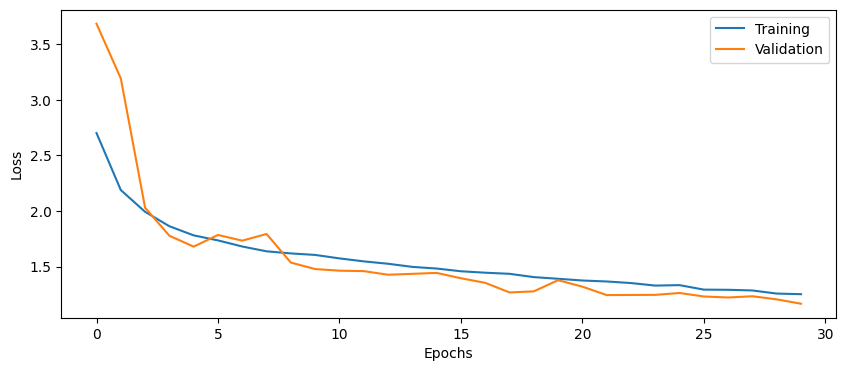

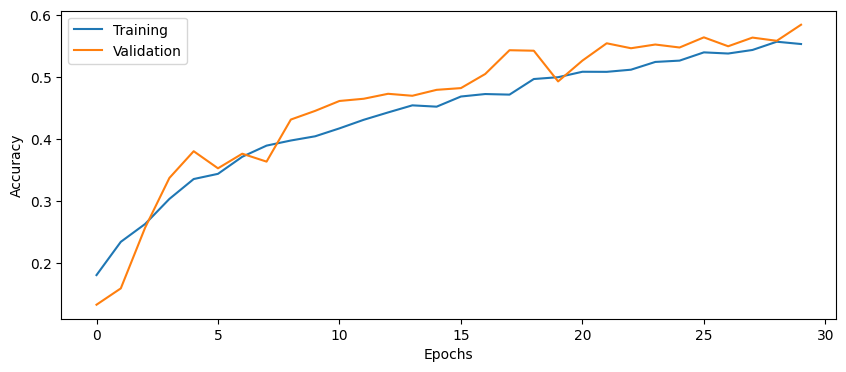

In [44]:
# Plot the history from the training run
plot_results(history6)

## Plot misclassified images

Lets plot some images where the CNN performed badly.

In [45]:
# Find misclassified images
y_pred=model6.predict(Xtest, verbose=0) 
y_pred=np.argmax(y_pred,axis=1)

y_correct = np.argmax(Ytest,axis=-1)

miss = np.flatnonzero(y_correct != y_pred)

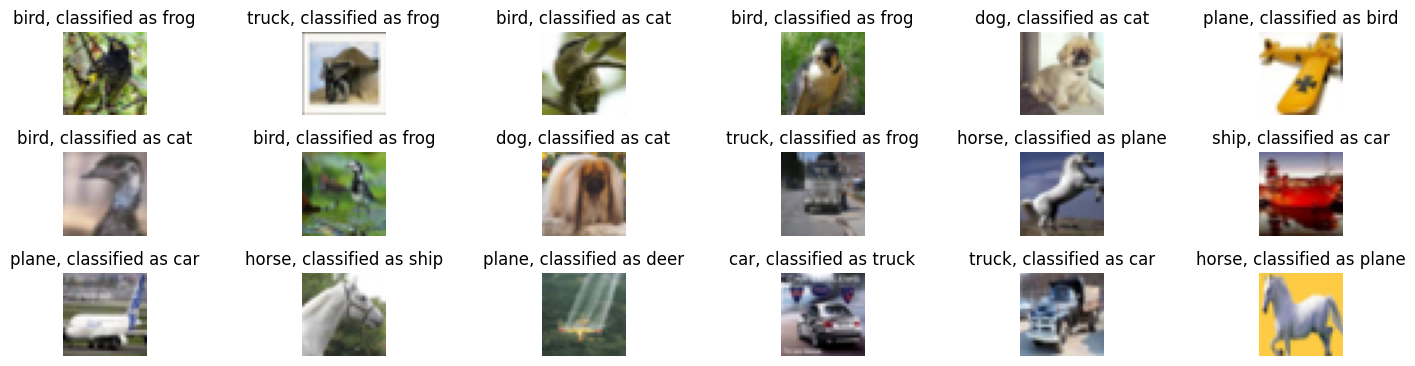

In [46]:
# Plot a few of them
plt.figure(figsize=(15,4))
perm = np.random.permutation(miss)
for i in range(18):
    im = (Xtest[perm[i]] + 1) * 127.5
    im = im.astype('int')
    label_correct = y_correct[perm[i]]
    label_pred = y_pred[perm[i]]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.axis('off')
    plt.title("{}, classified as {}".format(classes[label_correct], classes[label_pred]))
plt.show()

##  5.3 Testing on another size

#### **<span style="color:red">Questions</span>**

28. This CNN has been trained on 32 x 32 images, can it be applied to images of another size? If not, why is this the case?

29. Is it possible to design a CNN that can be trained on images of one size, and then applied to an image of any size? How?

#### **<span style="color:green">Answers</span>**
28. No, this can't be applied as the first layer is dependent on the input size of the image. The flattening of the 2D vector into 1D also depends on the fixed input size, hence, it will throw errors while training during the forward propogation of the network.
29. It is possible to do so by using the padding functionality. Every image can be converted to the required size by resizing/padding. Global pooling is also one of the solution to apply this design as it reduces the dimension to certain fixed size.

# Part 6: Carbon footprint

In this next section we will evaluate the carbon footprint of training our CNN model. In particular we will look at the effect of training hyper parameters of carbon footprint. You can read more about this topic [here](https://arxiv.org/abs/2007.03051) or [here](https://research.google/blog/good-news-about-the-carbon-footprint-of-machine-learning-training/). 

In this lab we will use the `carbontracker` library that easily integrates with any model training routine. See the example in the [documentation](https://github.com/lfwa/carbontracker?tab=readme-ov-file) on how to use the carbon tracker.

#### **<span style="color:red">Questions</span>**

28. Keeping the model architecture fixed, which training parameter impacts the carbon footprint? 
    
29. The choice of batch size can dramatically impact carbon foot print: why is this the case?
    
30. Assume that you have a model with 100 million parameters running in the backend of a service with 5 million users. How can the carbon footprint of using this model be reduced?

#### **<span style="color:green">Answers</span>**
28. The learning rate, batch size, epochs and complexity of architecture impacts the carbon footprint. It directly correlates to the amount of time the model is training impacting the electricity consumption and heat generation.
29. Batch size directly impacts the training process. Larger batch size means memory consumption and larger time to process every step. Smaller batch size is means frequent updates and the model trains for a longer time, more power consumption.
30. This can be reduced by using less complex model, using renewable source of energy to train the model, using efficient algorithms, etc.

In [49]:
from carbontracker.tracker import CarbonTracker

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Setup training parameters
batch_size = 16
epochs = 30
input_shape = (32,32,3)

# Build model (your best config)
model7 = build_CNN(
    input_shape=input_shape,
    loss=tf.keras.losses.CategoricalCrossentropy(),
    n_conv_layers=5,  
    n_filters=32,  
    n_dense_layers=2,  
    n_nodes=128,  
    use_dropout=True,  
    learning_rate=0.001,
    act_fun='relu',
    optimizer='adam',
    print_summary=False
)

# Create a CarbonTracker object
tracker = CarbonTracker(epochs=epochs)


# start carbon tracking
tracker.epoch_start()

# fit model
model7.fit(
    Xtrain, Ytrain,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(Xval, Yval)
)

tracker.epoch_end()

# ============================================


CarbonTracker: The following components were found: CPU with device(s) .
CarbonTracker: WARNING - ElectricityMaps API key not set. Will default to average carbon intensity.
CarbonTracker: WARNING - Failed to retrieve carbon intensity: Defaulting to average carbon intensity 40.694878 gCO2/kWh.
Epoch 1/30
469/469 [==============================] - 18s 33ms/step - loss: 2.5756 - accuracy: 0.1992 - val_loss: 3.1184 - val_accuracy: 0.1628
Epoch 2/30
469/469 [==============================] - 15s 32ms/step - loss: 2.0206 - accuracy: 0.2663 - val_loss: 1.8032 - val_accuracy: 0.3156
Epoch 3/30
469/469 [==============================] - 15s 32ms/step - loss: 1.7980 - accuracy: 0.3371 - val_loss: 1.7666 - val_accuracy: 0.3420
Epoch 4/30
469/469 [==============================] - 15s 33ms/step - loss: 1.6708 - accuracy: 0.3808 - val_loss: 1.4827 - val_accuracy: 0.4472
Epoch 5/30
469/469 [==============================] - 15s 32ms/step - loss: 1.5752 - accuracy: 0.4132 - val_loss: 1.4228 - val_acc

# Part 7: Pre-trained 2D CNNs

There are many deep 2D CNNs that have been pre-trained using the large ImageNet database (several million images, 1000 classes). Import a pre-trained ResNet50 network from Keras applications. Show the network using `model.summary()`

#### **<span style="color:red">Questions</span>**

31. How many convolutional layers does ResNet50 have? 

32. How many trainable parameters does the ResNet50 network have? 

33. What is the size of the images that ResNet50 expects as input?

34. Using the answer to question 30, explain why the second derivative is seldom used when training deep networks.

35. What do you expect the carbon footprint of using pre-trained networks to be compared to training a model from scratch?

#### **<span style="color:green">Answers</span>**
31. ResNet50 has 49 convolutional layers and 1 Dense layer, making total 50 layers
32. It has 25583592 trainable parameters.
33. (224, 224, 3) is the expected input size
34. Due to the computational complexity, the second derivative is rarely use in training deep networks
35. Using a pretrained model and just fine-tuning it significantly reduces the carbon footprint compared to training it from scratch


After loading the pre-trained CNN, apply it to 5 random color images that you download and copy to the cloud machine or your own computer. Are the predictions correct? How certain is the network of each image class?

These pre-trained networks can be fine tuned to your specific data, and normally only the last layers need to be re-trained, but it will still be too time consuming to do in this elaboration.

Some useful functions:
- `load_img` and `img_to_array` in [tf_keras.utils](https://www.tensorflow.org/api_docs/python/tf/keras/utils).
- `ResNet50` in [tf_keras.applications.ResNet50](tf.keras.applications.ResNet50).
- `preprocess_input` in [tf_keras.applications.resnet](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet/preprocess_input).
- `decode_predictions` in [tf_keras.applications.resnet](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet/decode_predictions).
- `expand_dims` in [numpy](https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html).

See [keras applications](https://keras.io/api/applications/) and the keras [resnet50-function](https://keras.io/api/applications/resnet/#resnet50-function) for more details.

In [55]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# import the necessary libraries and functions 
from tf_keras.applications import ResNet50
from tf_keras.utils import load_img, img_to_array
from tf_keras.applications.resnet import preprocess_input, decode_predictions
import numpy as np

# load the pre-trained ResNet50 model
resnet50 = ResNet50(weights='imagenet')

# print the model summary
resnet50.summary()

# load the image and preprocess it
image_path = "glass.jpeg"
image = load_img(image_path, target_size=(224, 224))
image_array = img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)
image_array = preprocess_input(image_array)

# predict the image
label = resnet50.predict(image_array)
decoded_predictions = decode_predictions(label, top=3)[0] 

# print the predicted label
#print(label)
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score * 100:.2f}%)")

# ============================================

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_5[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

# Part 8 (OPTIONAL)

Set up `Ray Tune` and run automatic hyper parameter optimization for the CNN model as we have done in the DNN lab. Remember that you have to define the `train_CNN` function, specify the hyper parameter search space and the number of samples to evaluate, among other.